<a href="https://colab.research.google.com/github/suryaprakash01999/surya/blob/main/suryaprakash_day53_diy_solution_doc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1. Problem Statement: K Means Clustering
Write a Python program that reads the Credit Card Customer Data.csv (provided
on LMS). The following are the tasks that need to be considered while
constructing the solution to Segregate customers based on the data provided
with the help of k-means clustering.
1. Load the Given CSV file into a DataFrame
2. Find missing values and drop the unnecessary columns
3. Univariate and bivariate analysis
4. Standardize the whole dataset
5. Find the within-cluster sum of square
6. Find the silhouette score
7. Use a line plot using matplotlib to find scores for different sizes of K and
choose the best size for the cluster and build the final model
8. Observe Cluster behavior with different columns.
9. Print Co-ordinates of all centroids and silhouette scores for the final model


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


NameError: ignored

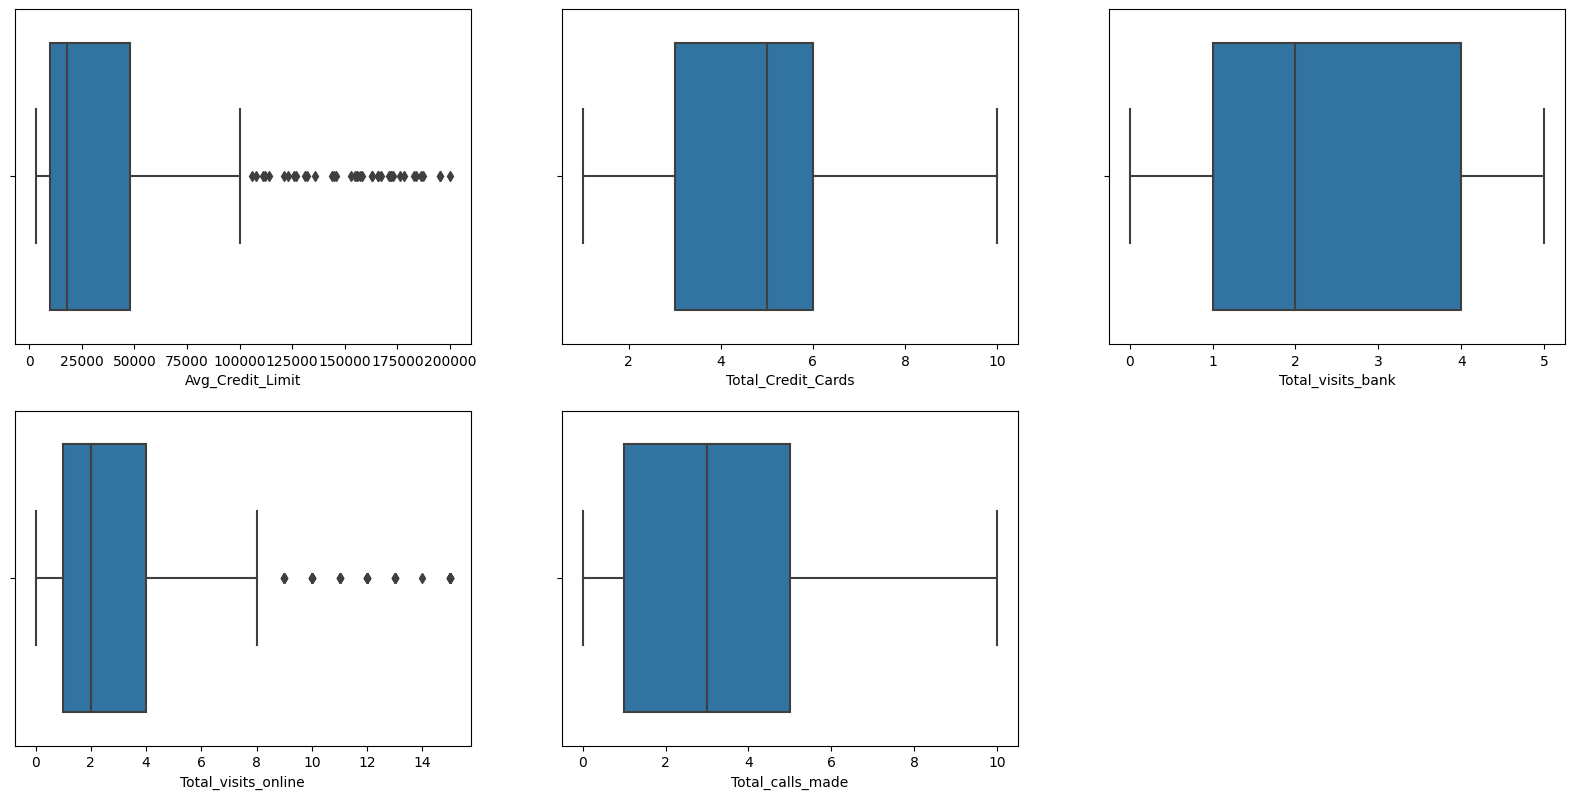

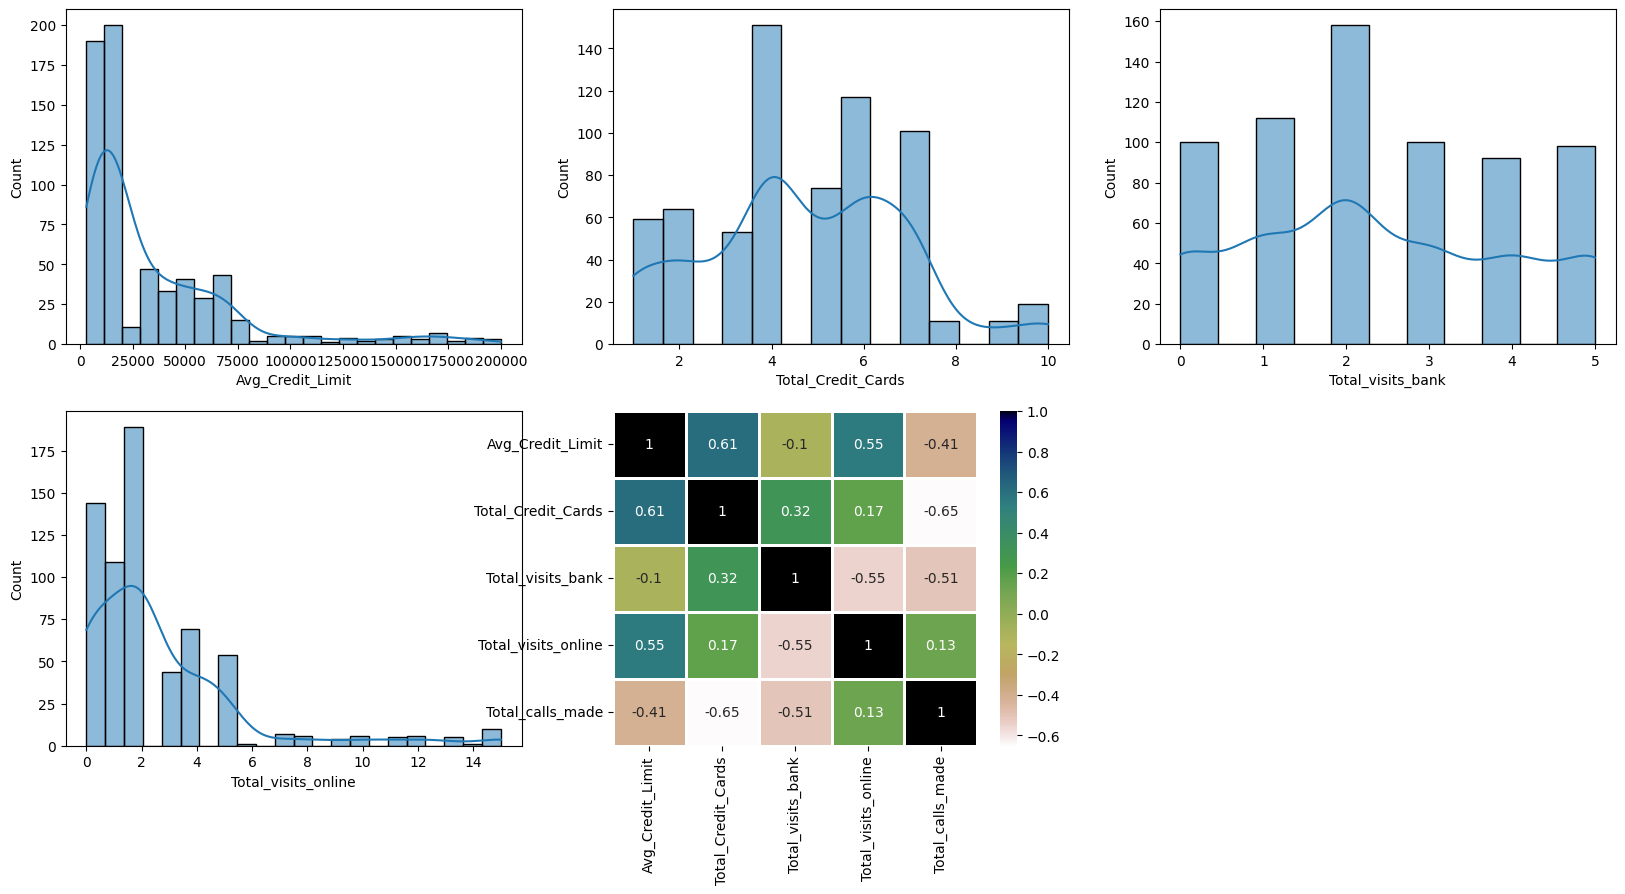

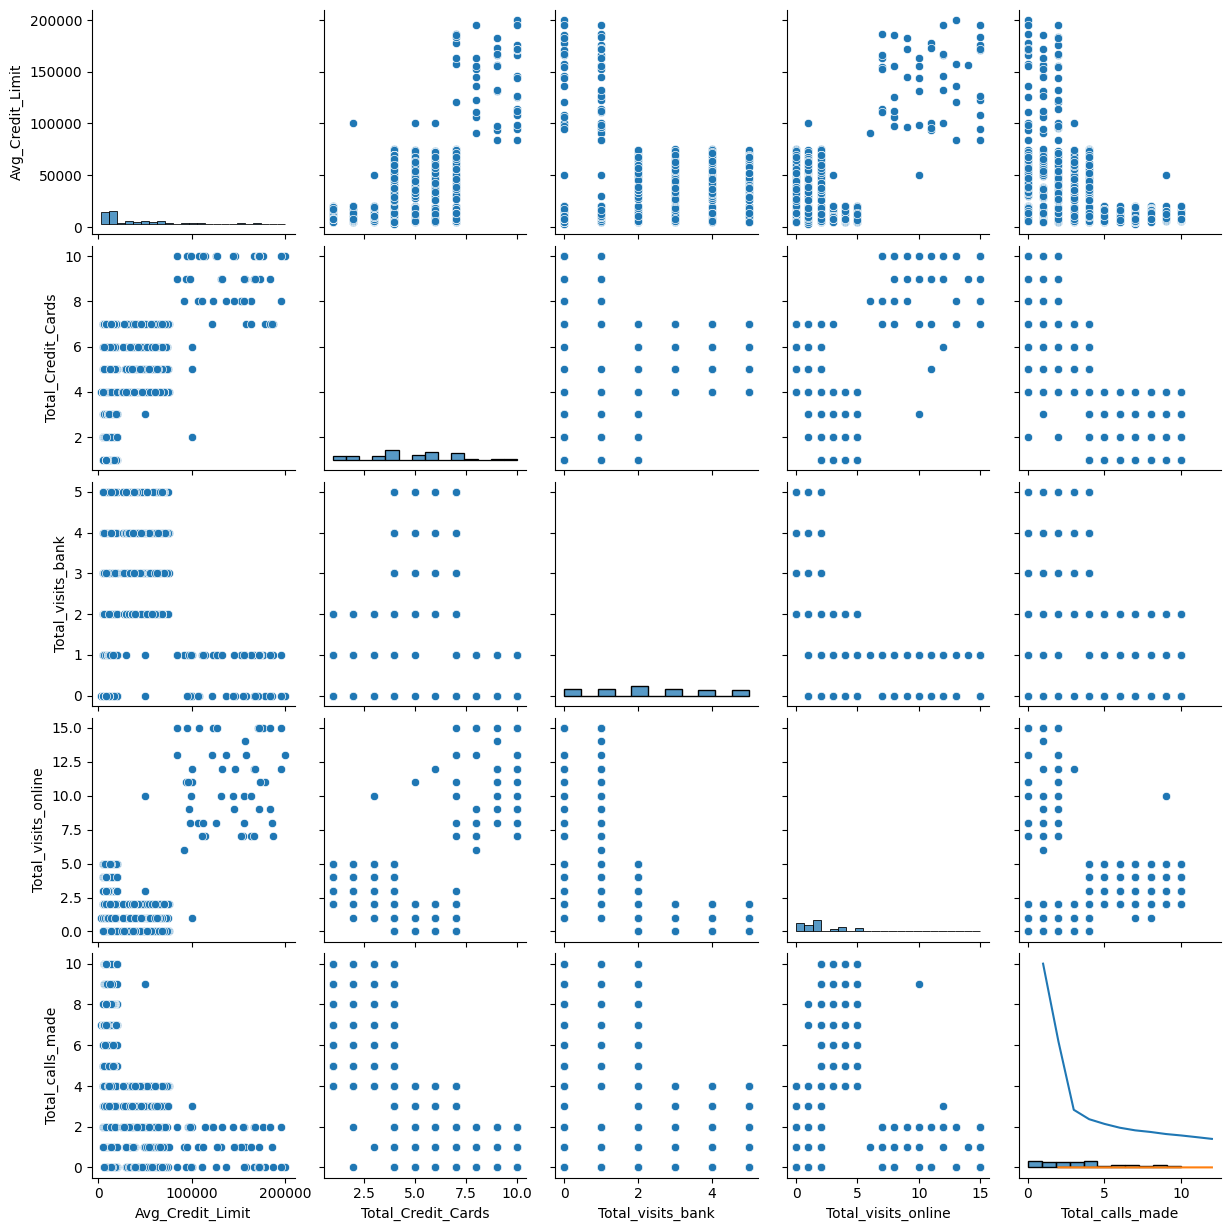

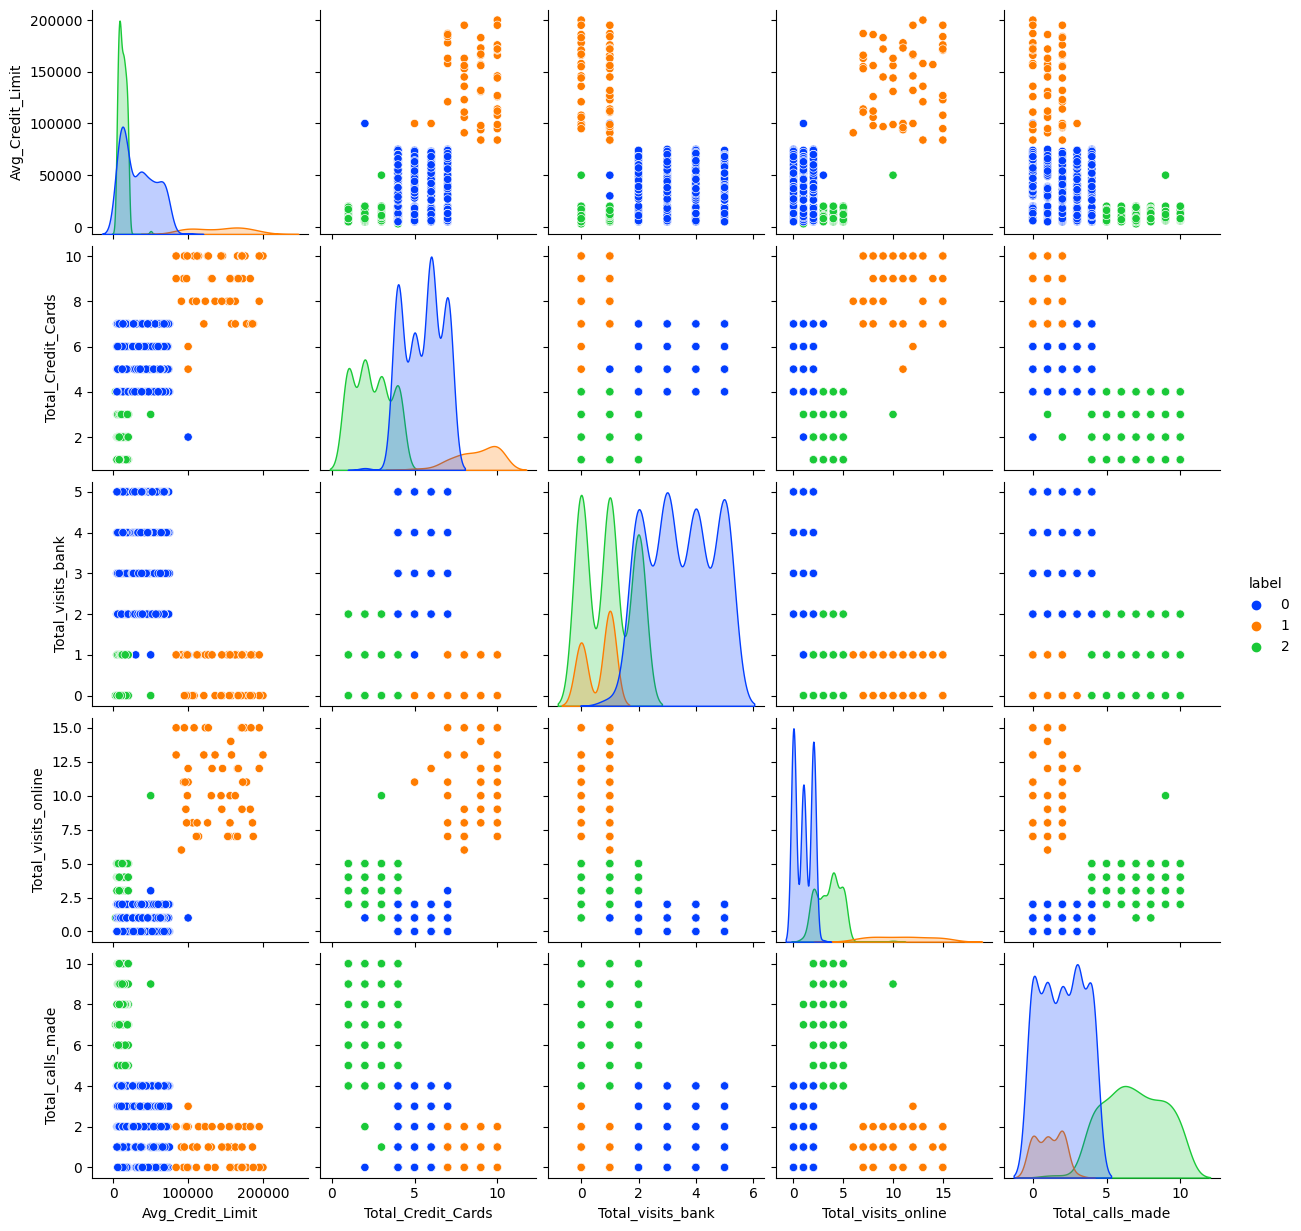

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # for plotting 
import seaborn as sns # for better interactive plotting
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler #to standardise the data
from sklearn.metrics import silhouette_score #for evaluation of model
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('Credit Card Customer Data.csv')
df

df.info()

df.describe()

df.columns 

df.isnull().sum() 
df.drop(columns=['Sl_No', 'Customer Key'],inplace=True)

i=1
plt.figure(figsize=(20,20))
for j in df.columns:
    plt.subplot(4,3,i)
    sns.boxplot(data=df,x=j)
    i+=1

i=1
plt.figure(figsize=(20,20))
for j in df.columns:
    plt.subplot(4,3,i)
    sns.histplot(data=df,x=df[j],kde=True)
    i+=1

df.corr() 

sns.heatmap(df.corr(),cmap='gist_earth_r',linewidths=1,annot=True)
sns.pairplot(df)
sc=StandardScaler()
scaled=sc.fit_transform(df)
scaled_data=pd.DataFrame(scaled,columns=df.columns)
scaled_data
wcss=[]
for i in range(1,13):
    km=KMeans(n_clusters=i)
    km.fit(scaled_data)
    wcss.append(km.inertia_)
slh_score=[]
for i in range(2,13):
    km=KMeans(n_clusters=i)
    km.fit(df)
    slh_score.append(silhouette_score(scaled_data,km.labels_))
plt.plot(range(1,13),wcss)
plt.ylabel('wcss')
plt.xlabel('k-value')

plt.plot(range(2,13),slh_score)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)
km1=KMeans(n_clusters=3)
km1.fit(scaled_data)
y=km1.predict(scaled_data)
df['label']=y
sns.pairplot(df,hue='label',palette='bright')
center=km1.cluster_centers_
Kmean_silihoute=silhouette_score(scaled_data,km1.labels_)
Kmean_silihoute 
total_credit_card[4-6] and avg_credit_limit(0-75000)
total_credit_card(0-3) and avg_credit_limit(0-25000)
total_credit_card(6-10) and avg_credit_limit>75000 